# N-Grams 

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.

"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |

In [1]:
# import modules
import xml.etree.ElementTree as ET
import pandas as pd
import sys
import string
import re
import nltk
import sys
import os
import gensim

# Add the src directory to sys.path
sys.path.append(os.path.abspath(r'C:\dev\NLP2RE_Sandbox\src'))

print(sys.version)
print(sys.executable)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
c:\ProgramData\anaconda3\python.exe


In [8]:
# create df
from utils import parse_xml

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

pd.set_option('display.max_colwidth', 100)

# Specify the path to your XML filec
xml_file_path = r'C:\dev\NLP2RE_Sandbox\data\work_data\2007-ertms.xml'
# Define the namespace
namespace = {'ns': 'req_document.xsd'}

# import utils.ParseXML as ParseXML
df = parse_xml.process_xml_with_namespace(xml_file_path, namespace)
df.head(10)


,tag,text,id,path
0,title,ERTMS/ETCS Functional Requirements Specification FRS,,req_document/title
1,version,5.00,,req_document/version
2,issue_date,2007-06-21,,req_document/issue_date
3,file_number,ERA/ERTMS/003204,,req_document/file_number
4,change_date,2007-06-21,,req_document/change_log/change_log_item/change_date
5,title,Introduction,1,req_document/p/title
6,p,This document defines the functional requirements for ERTMS/ETCS (EUROPEAN RAIL TRAFFIC MANAGEME...,1.1,req_document/p/p/text_body
7,p,In the requirements of this document: - (M) = Mandatory:The requirement shall be respected in ev...,1.5,req_document/p/p/text_body
8,title,General requirements,3,req_document/p/title
9,title,Basic functioning,3.1,req_document/p/p/title


## GOAL 1

Gensim's standard implementation of Latent Dirichlet Allocation (LDA) does not directly support using n-grams as input for topic modeling. The LDA model in Gensim typically operates on individual words rather than n-grams.
While Gensim offers robust tools for text preprocessing, dictionary creation, and topic modeling, the default LDA implementation focuses on word-level tokens. If you intend to incorporate n-grams into your topic modeling process using Gensim, you may need to preprocess your text data externally to generate n-grams before applying the LDA model.

This additional preprocessing step would involve creating bigrams, trigrams or higher order n-grams from your text data and then feeding these n-grams into the LDA model for topic modeling.

In summary, while Gensim's LDA model does not natively support n-grams, it is possible to preprocess the text to generate n-grams and then use those as input to the LDA model. But this requires additional custom preprocessing steps outside of Gensim's standard LDA implementation.

### Tryout - Gensim
30/05/2024

```python
models.phrases – Phrase (collocation) detection
```
Automatically detect common phrases – aka multi-word expressions, word n-gram collocations – from a stream of sentences.

REF: https://radimrehurek.com/gensim/models/phrases.html

NOT WORKING

In [9]:
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

# Create training corpus. Must be a sequence of sentences (e.g. an iterable or a generator).
sentences = Text8Corpus(datapath('testcorpus.txt'))

# Each sentence must be a list of string tokens:
print(type(sentences))
first_sentence = next(iter(sentences))
print(first_sentence[:])


<class 'gensim.models.word2vec.Text8Corpus'>
['computer', 'human', 'interface', 'computer', 'response', 'survey', 'system', 'time', 'user', 'interface', 'system', 'user', 'eps', 'human', 'system', 'system', 'eps', 'response', 'time', 'user', 'trees', 'trees', 'graph', 'trees', 'graph', 'minors', 'survey', 'graph', 'minors']


In [10]:
from utils import clean_data
import pprint

df['text_clean'] = df['text'].apply(lambda x: clean_data.data_preparation(x))
sentences = clean_data.df_tokenize(df['text_clean'], 2)
#pprint.pprint(clean_text)

print(type(sentences))
first_sentence = next(iter(sentences))
print(first_sentence[:])



<class 'list'>
['ertm', 'etc', 'function', 'requir', 'specif']


In [11]:
# Train a toy phrase model on our training corpus.
phrase_model = Phrases(sentences, min_count=1, threshold=1, connector_words=ENGLISH_CONNECTOR_WORDS)

# Apply the trained phrases model to a new, unseen sentence.
new_sentence = ['trees', 'graph', 'minors']
phrase_model[new_sentence]

# The toy model considered "trees graph" a single phrase => joined the two
# tokens into a single "phrase" token, using our selected `_` delimiter.


['trees', 'graph', 'minors']

In [12]:

# Apply the trained model to each sentence of a corpus, using the same [] syntax:
for sent in phrase_model[sentences]:
    pass

# Update the model with two new sentences on the fly.
phrase_model.add_vocab([["hello", "world"], ["meow"]])


In [13]:

# Export the trained model = use less RAM, faster processing. Model updates no longer possible.
frozen_model = phrase_model.freeze()
# Apply the frozen model; same results as before:
frozen_model[new_sentence]
['trees_graph', 'minors']

# Save / load models.
frozen_model.save("/tmp/my_phrase_model.pkl")
model_reloaded = Phrases.load("/tmp/my_phrase_model.pkl")
model_reloaded[['trees', 'graph', 'minors']]  # apply the reloaded model to a sentence
['trees_graph', 'minors']

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/my_phrase_model.pkl'

## GOAL 2
wordcloud generation using bi and trigrams

##/02/2024 


In [14]:
# create 'cleaned_text' attribute: remove punctuation, tokenize, remove stopwords, and stem

from utils import clean_data
df['cleaned_text'] = df['text'].apply(lambda x: clean_data.clean_text(x,False,False))

# Convert the list to a string separated by spaces
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x))
df.head()

,tag,text,id,path,text_clean,cleaned_text
0,title,ERTMS/ETCS Functional Requirements Specification FRS,,req_document/title,"[ertm, etc, function, requir, specif, fr]",ertms etcs functional requirements specification frs
1,version,5.00,,req_document/version,"[5, 00]",5 00
2,issue_date,2007-06-21,,req_document/issue_date,"[2007, 06, 21]",2007-06-21
3,file_number,ERA/ERTMS/003204,,req_document/file_number,"[era, ertm, 003204]",era ertms 003204
4,change_date,2007-06-21,,req_document/change_log/change_log_item/change_date,"[2007, 06, 21]",2007-06-21


In [15]:
ngram_range_min=4
ngram_range_max=8

In [16]:
# Apply CountVectorizer (w/ N-Grams)

# CountVectorizer is a tool for converting a collection of text documents to a matrix of token counts.
# Use it to create a vectorizer object that can be used to transform text data into a numerical matrix. 
# This matrix represents the frequency of each word in the text, which can be used as input to various machine learning models.
# The ngram_range parameter specifies the range of n-values for different n-grams to be extracted.
# ngram_range=(2, 4) means that the vectorizer will consider n-grams of sizes 2, 3, and 4.

from sklearn.feature_extraction.text import CountVectorizer

# create a vectorizer object
ngram_vect = CountVectorizer(ngram_range=(ngram_range_min,ngram_range_max))

# transform text data into a numerical matrix (Type 'csr_matrix')
X_counts = ngram_vect.fit_transform(df['cleaned_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

(432, 19960)
['03 all emergency brake' '03 all emergency brake applications'
 '03 all emergency brake applications initiated' ...
 'would pass before in the direction'
 'would pass before in the direction of'
 'would pass before in the direction of travel']


In [17]:
# display df 
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = ngram_vect.get_feature_names_out()
X_counts_df.head(-20)

,03 all emergency brake,03 all emergency brake applications,03 all emergency brake applications initiated,03 all emergency brake applications initiated by,03 all emergency brake applications initiated by etcs,03 may be released,03 may be released by,03 may be released by the,03 may be released by the driver,03 may be released by the driver at,...,without violating the static,without violating the static train,without violating the static train speed,without violating the static train speed profile,without violating the static train speed profile and,would pass before in,would pass before in the,would pass before in the direction,would pass before in the direction of,would pass before in the direction of travel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Create a the dictionary containing attribute names and their sums
from scipy.sparse import csr_matrix

# Convert X_counts to a dense matrix for easier manipulation
X_counts_dense = X_counts.toarray()

# Get feature names (attribute names)
feature_names = ngram_vect.get_feature_names_out()

# Initialize a dictionary to store attribute sums
attribute_sums = {}

# Iterate over each attribute (column) in the dense matrix
for i, attribute_name in enumerate(feature_names):
    # Extract the i-th column (attribute) from the dense matrix
    attribute_column = X_counts_dense[:, i]
    # Calculate the sum of values in the attribute column
    attribute_sum = attribute_column.sum()
    # Store the attribute name and its sum in the dictionary
    attribute_sums[attribute_name] = attribute_sum

# Print the dictionary containing attribute names and their sums
print(attribute_sums)


{'03 all emergency brake': 1, '03 all emergency brake applications': 1, '03 all emergency brake applications initiated': 1, '03 all emergency brake applications initiated by': 1, '03 all emergency brake applications initiated by etcs': 1, '03 may be released': 1, '03 may be released by': 1, '03 may be released by the': 1, '03 may be released by the driver': 1, '03 may be released by the driver at': 1, '24 hours and shall': 1, '24 hours and shall be': 1, '24 hours and shall be very': 1, '24 hours and shall be very detailed': 1, '24 hours and shall be very detailed operational': 1, '541 03 all emergency': 1, '541 03 all emergency brake': 1, '541 03 all emergency brake applications': 1, '541 03 all emergency brake applications initiated': 1, '541 03 all emergency brake applications initiated by': 1, '541 03 may be': 1, '541 03 may be released': 1, '541 03 may be released by': 1, '541 03 may be released by the': 1, '541 03 may be released by the driver': 1, 'ability to inform train': 1, 'a

In [19]:
# Find and display the 20 entries with the highest sums
top_10_attributes = sorted(attribute_sums.items(), key=lambda item: item[1], reverse=True)[:20]
print("Top 20 attributes by sum:")
for attribute, total in top_10_attributes:
    print(f"{attribute}: {total}")

Top 20 attributes by sum:
shall be able to: 20
it shall be possible: 19
shall be possible to: 19
the etcs trainborne equipment: 19
it shall be possible to: 18
the driver shall be: 16
etcs trainborne equipment shall: 12
shall be capable of: 12
the etcs trainborne equipment shall: 12
driver shall be able: 10
driver shall be able to: 10
the driver shall be able: 10
the driver shall be able to: 10
be indicated on the: 8
be indicated on the dmi: 8
be shown on the: 8
be shown on the dmi: 8
indicated on the dmi: 8
shall be indicated on: 8
shall be indicated on the: 8


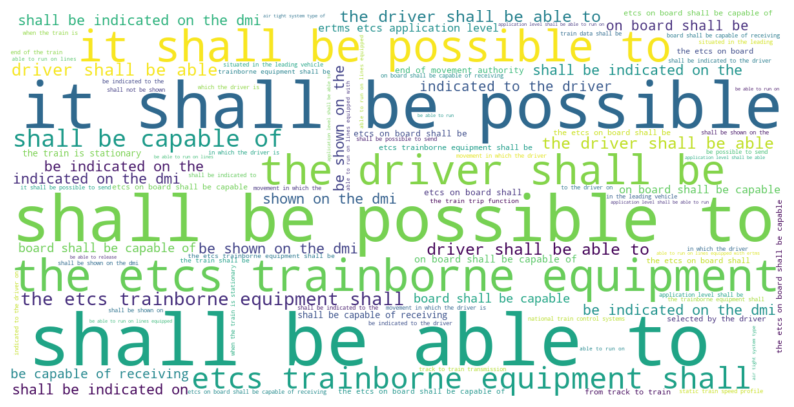

: 

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sort the attribute_sums dictionary by values in descending order
sorted_attributes = sorted(attribute_sums.items(), key=lambda x: x[1], reverse=True)

# Extract the top grams and their frequencies
words = dict(sorted_attributes[:100])

# Generate word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(words)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()


### Conclusions and steps forward

Stopwords like "shall" and "be" have a high number of occurences. Without stopword removal, there is a high occurence of n-grams that are not relevant of the context of the document.
e.g: 
- shall be able to: 20 Ocurrences
- it shall be possible: 19
- shall be possible to: 19
- the etcs trainborne equipment: 19
- it shall be possible to: 18
- the driver shall be: 16
- etcs trainborne equipment shall: 12
- shall be capable of: 12
- the etcs trainborne equipment shall: 12
- driver shall be able: 10

There are repetitions
- shall be indicated on: 8
- shall be indicated on the: 8

For the repetition, a greedy check can be used to find if the entry is repeated
1. Get all entries with lowest number of words
2. Get individual entry: A 'shall be indicated on'
3. Check one large entry: B 'shall be indicated on the'
4. Remove initial words from B until A and B are the same size
5. A == B ? If true, remove A from set
6. Repeat from step 4, but now for final words